# Pandas: an in-class exercise
Sep. 9, 2020

No phonemes this time.  Instead, we will be manipulating some non-linguistic data as a way to get you comfortable with Pandas.  In an acknowledgement of a fact of life that we have all had to deal with recently, we will be examining the AQI or **Air Quality Index** over the recent past in Alameda County, and also for comparison in Santa Cruz county.  The data we will be examining are from the [EPA](https://www.epa.gov/outdoor-air-quality-data/air-quality-index-daily-values-report).

Then in this week's homework we will use the same Pandas techniques on a question that does concern language.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in EPA PM 2.5 air-quality data from Alameda county.
df = pd.read_csv("aqidaily2020-alameda.csv")
df

,Date,PM2.5 AQI Value,AQI Category,Site Name,Site ID,Source
0,01/01/2020,53,Moderate,Oakland,06-001-0009,AQS
1,01/02/2020,43,Good,Berkeley Aquatic Park,06-001-0013,AQS
2,01/03/2020,74,Moderate,Berkeley Aquatic Park,06-001-0013,AQS
3,01/04/2020,45,Good,Livermore,06-001-0007,AQS
4,01/05/2020,33,Good,Livermore,06-001-0007,AQS
...,...,...,...,...,...,...
242,08/30/2020,67,Moderate,Livermore,06-001-0007,AirNow
243,08/31/2020,74,Moderate,Oakland,06-001-0009,AirNow
244,09/01/2020,70,Moderate,Pleasanton - Owens Ct,06-001-0015,AirNow
245,09/02/2020,62,Moderate,Pleasanton - Owens Ct,06-001-0015,AirNow


In [3]:
# some of the column names are a bit long - so let's rename them.
df = df.rename(columns={"PM2.5 AQI Value": "AQI", "AQI Category": "Category", "Site Name": "Site"})
df

,Date,AQI,Category,Site,Site ID,Source
0,01/01/2020,53,Moderate,Oakland,06-001-0009,AQS
1,01/02/2020,43,Good,Berkeley Aquatic Park,06-001-0013,AQS
2,01/03/2020,74,Moderate,Berkeley Aquatic Park,06-001-0013,AQS
3,01/04/2020,45,Good,Livermore,06-001-0007,AQS
4,01/05/2020,33,Good,Livermore,06-001-0007,AQS
...,...,...,...,...,...,...
242,08/30/2020,67,Moderate,Livermore,06-001-0007,AirNow
243,08/31/2020,74,Moderate,Oakland,06-001-0009,AirNow
244,09/01/2020,70,Moderate,Pleasanton - Owens Ct,06-001-0015,AirNow
245,09/02/2020,62,Moderate,Pleasanton - Owens Ct,06-001-0015,AirNow


In [4]:
# let's look at just the AQI column
df.AQI

0      53
1      43
2      74
3      45
4      33
       ..
242    67
243    74
244    70
245    62
246    95
Name: AQI, Length: 247, dtype: int64

In [5]:
# here's another way to get the same thing
df['AQI']

0      53
1      43
2      74
3      45
4      33
       ..
242    67
243    74
244    70
245    62
246    95
Name: AQI, Length: 247, dtype: int64

In [6]:
# now let's look at just the Category column
df.Category

0      Moderate
1          Good
2      Moderate
3          Good
4          Good
         ...   
242    Moderate
243    Moderate
244    Moderate
245    Moderate
246    Moderate
Name: Category, Length: 247, dtype: object

Now that we've read in the data, we'll start by plotting the data in various ways, to get a bird's eye view of things.  There are many plotting options, and we'll consider just a few.  For a more thorough treatment, see [this guide](https://pandas.pydata.org/docs/user_guide/visualization.html).

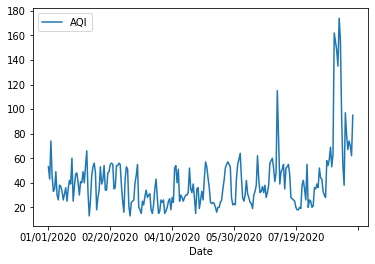

In [7]:
# simple numerical line plot for AQI
df.plot(x="Date", y="AQI", kind='line')
plt.show()

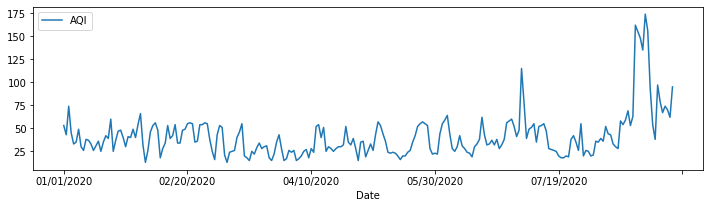

In [8]:
# simple plot, elongated - figsize takes (width,height) as parameters.
df.plot(x="Date", y="AQI", kind='line', figsize=(12,3))
plt.show()

In [9]:
# aug 16, 2020, or "08/16/2020", is when dry lightning struck and our AQI problems started.
# we'd like to draw a red vertical line at that point in the graph, to mark that relevant point in time.
# to do that, we need to know which index along the x-axis corresponds to "08/16/2020".
# so we start by finding that sub-part of the df that corresponds to Date == '08/16/2020'.
sub_df = df[df.Date=='08/16/2020']
sub_df

,Date,AQI,Category,Site,Site ID,Source
228,08/16/2020,69,Moderate,Pleasanton - Owens Ct,06-001-0015,AirNow


In [10]:
# this ability to select df rows by value is *really* useful - you can also use it for categorical data.
df[df.Category=='Unhealthy']

,Date,AQI,Category,Site,Site ID,Source
231,08/19/2020,162,Unhealthy,Pleasanton - Owens Ct,06-001-0015,AirNow
232,08/20/2020,155,Unhealthy,Livermore,06-001-0007,AirNow
235,08/23/2020,174,Unhealthy,Livermore,06-001-0007,AirNow
236,08/24/2020,156,Unhealthy,Pleasanton - Owens Ct,06-001-0015,AirNow


In [11]:
# but we're not interested in categories right now - we're interested in our target date, so:
sub_df = df[df.Date=='08/16/2020']

# and now we grab the indices for this sub-df.
indices = sub_df.index
indices

Int64Index([228], dtype='int64')

In [12]:
# this is a list-like object, because there could have been multiple rows matching that date.
# here we only have one index, so we have to extract it from the list, and it's the first one.
ix = indices[0]
ix

228

In [13]:
# Pulling all that index-finding stuff together, we have the following to get our August 16 2020 index.
ix = df[df.Date=='08/16/2020'].index[0]
ix

228

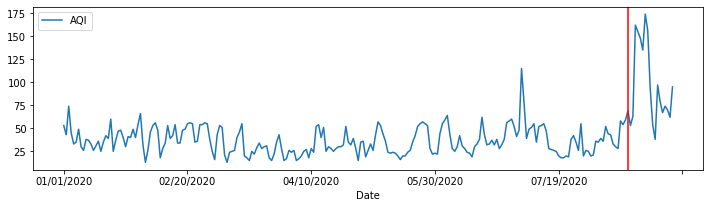

In [14]:
# simple plot, elongated, with a marker for Aug 16, 2020.
# find the df index that corresponds to Date == '08/16/2020'.
ix = df[df.Date=='08/16/2020'].index[0]
ax = df.plot(x="Date", y="AQI", kind='line', figsize=(12,3))
# plot a vertical line at our target date.
ax.axvline(ix,color='red')  # draw vertical line at selected date.
plt.show()

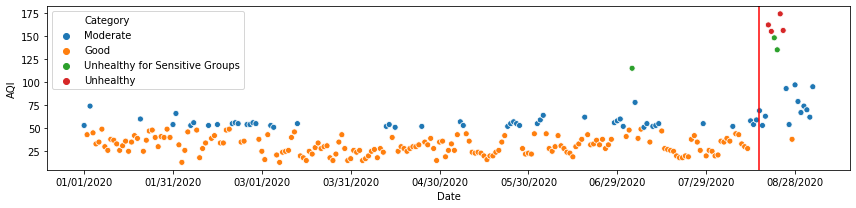

In [15]:
# show alameda county data, color-coded for AQI category.
plt.figure(figsize=(12,3))
# get certain dates for labeling x-axis - don't show all xticks to avoid crowding
ddf = df.Date[df.index % 30 == 0]  # Selects every 30th row starting from 0
new_xticks = ddf.index
new_xtick_labels = ddf.values
# plot the adjusted xticks
plt.xticks(new_xticks,new_xtick_labels)
# find the df index that corresponds to Date == '08/16/2020'.
ix = df[df.Date=='08/16/2020'].index.tolist()[0]
# plot a vertical line at date 8/16/2020.
plt.axvline(ix,color='red')  # draw vertical line at selected date.
# plot the data - note, this uses seaborn, not matplotlib.
ax = sns.scatterplot(x="Date", y="AQI", hue='Category', data=df)
# tight layout, i.e. nix margin padding
plt.tight_layout()
plt.savefig("AQI.pdf")
plt.show()

In [16]:
# this is all fine as far as it goes, but it's only about alameda county.
# what we'd like to do is put data from both alameda and santa cruz counties in a single df.
# but how will we tell them apart?  
# by adding a new column, specifying for each row in the df which county it's from.
df['County']='Alameda'  # all rows take the same value, "Alameda"
df

,Date,AQI,Category,Site,Site ID,Source,County
0,01/01/2020,53,Moderate,Oakland,06-001-0009,AQS,Alameda
1,01/02/2020,43,Good,Berkeley Aquatic Park,06-001-0013,AQS,Alameda
2,01/03/2020,74,Moderate,Berkeley Aquatic Park,06-001-0013,AQS,Alameda
3,01/04/2020,45,Good,Livermore,06-001-0007,AQS,Alameda
4,01/05/2020,33,Good,Livermore,06-001-0007,AQS,Alameda
...,...,...,...,...,...,...,...
242,08/30/2020,67,Moderate,Livermore,06-001-0007,AirNow,Alameda
243,08/31/2020,74,Moderate,Oakland,06-001-0009,AirNow,Alameda
244,09/01/2020,70,Moderate,Pleasanton - Owens Ct,06-001-0015,AirNow,Alameda
245,09/02/2020,62,Moderate,Pleasanton - Owens Ct,06-001-0015,AirNow,Alameda


In [17]:
# now let's analogously read in data from santa cruz county, into a different df, sc_df.
# and we'll rename columns as we did before.
sc_df = pd.read_csv("aqidaily2020-santa-cruz.csv")
sc_df = sc_df.rename(columns={"PM2.5 AQI Value": "AQI", "AQI Category": "Category", "Site Name": "Site"})

# and now let's add the County column again, specifying santa cruz this time.
sc_df['County']='Santa Cruz'
sc_df

,Date,AQI,Category,Site,Site ID,Source,County
0,01/01/2020,38,Good,Santa Cruz,06-087-0007,AQS,Santa Cruz
1,01/02/2020,25,Good,Santa Cruz,06-087-0007,AQS,Santa Cruz
2,01/03/2020,54,Moderate,San Lorenzo Valley Middle School,06-087-1005,AQS,Santa Cruz
3,01/04/2020,35,Good,San Lorenzo Valley Middle School,06-087-1005,AQS,Santa Cruz
4,01/05/2020,22,Good,Santa Cruz,06-087-0007,AQS,Santa Cruz
...,...,...,...,...,...,...,...
242,08/30/2020,65,Moderate,San Lorenzo Valley Middle School,06-087-1005,AirNow,Santa Cruz
243,08/31/2020,57,Moderate,San Lorenzo Valley Middle School,06-087-1005,AirNow,Santa Cruz
244,09/01/2020,27,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz
245,09/02/2020,43,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz


In [18]:
# at this point we have two separate dfs for the two counties.
# let's see how many lines are in each.
print("Alameda has",len(df),"entries and Santa Cruz has",len(sc_df),"entries.")
print("Which comes to",len(df)+len(sc_df),"entries total.")

Alameda has 247 entries and Santa Cruz has 247 entries.
Which comes to 494 entries total.


In [19]:
# now let's append the two dfs together into one.
# this next line appends sc_df to df, and assigns the resulting dataframe to the variable df.
# we ignore_index because the indices are not meaningful, and we want the rows renumbered 0,1,... n-1.
df = df.append(sc_df,ignore_index=True)
df

,Date,AQI,Category,Site,Site ID,Source,County
0,01/01/2020,53,Moderate,Oakland,06-001-0009,AQS,Alameda
1,01/02/2020,43,Good,Berkeley Aquatic Park,06-001-0013,AQS,Alameda
2,01/03/2020,74,Moderate,Berkeley Aquatic Park,06-001-0013,AQS,Alameda
3,01/04/2020,45,Good,Livermore,06-001-0007,AQS,Alameda
4,01/05/2020,33,Good,Livermore,06-001-0007,AQS,Alameda
...,...,...,...,...,...,...,...
489,08/30/2020,65,Moderate,San Lorenzo Valley Middle School,06-087-1005,AirNow,Santa Cruz
490,08/31/2020,57,Moderate,San Lorenzo Valley Middle School,06-087-1005,AirNow,Santa Cruz
491,09/01/2020,27,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz
492,09/02/2020,43,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz


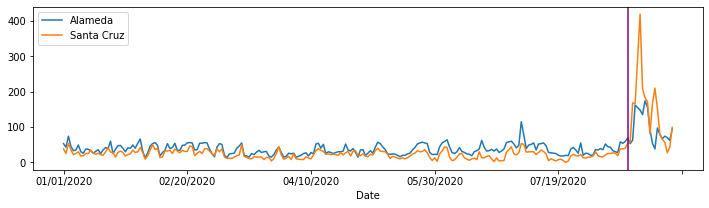

In [20]:
# now print AQI for both counties together, so we can compare.
ax = plt.gca()  # get current axes for the two plots to share.
# now plot the 2 sub-dfs, one per county, using the same axes.
df[df.County=='Alameda'].plot(kind='line', x='Date', y='AQI', label='Alameda', figsize=(12,3), ax=ax)
df[df.County=='Santa Cruz'].plot(kind='line', x='Date', y='AQI', label='Santa Cruz', ax=ax)
# mark our target date, as usual
ix = df[df.Date=='08/16/2020'].index[0]
ax.axvline(ix,color='purple')  # draw vertical line at selected date.
plt.show()

It's useful to start by plotting your data, sometimes a few different ways, to get a global view of things.  Now that we've done that, we can make a few qualitative observations, for us to follow up on:
- Both Alameda and Santa Cruz counties showed a large increase in AQI after Aug. 16.
- After Aug. 16, Santa Cruz had higher AQI than Alameda.
- Before Aug. 16, it looks as if Santa Cruz may have sometimes had slightly **lower** AQI than Alameda.

Let's get quantitative about these ideas.

In [21]:
# before taking things apart, let's look at overall descriptive stats for AQI.
df.AQI.describe()

count    494.000000
mean      36.516194
std       35.113879
min        0.000000
25%       20.000000
50%       29.500000
75%       42.000000
max      419.000000
Name: AQI, dtype: float64

In [22]:
# separate out sub-dfs from before and after our target date. 
target_date = '08/16/2020'
before = df[df.Date < target_date]
after = df[df.Date > target_date]
# print out some basic stats on AQI in those two ranges.
print ("Minimum AQI before", target_date,"was",before.AQI.min())
print ("Minimum AQI after", target_date,"was",after.AQI.min())
print ("Average AQI before", target_date,"was",before.AQI.mean())
print ("Average AQI after", target_date,"was",after.AQI.mean())
print ("Maximum AQI before", target_date,"was",before.AQI.max())
print ("Maximum AQI after", target_date,"was",after.AQI.max())

Minimum AQI before 08/16/2020 was 0
Minimum AQI after 08/16/2020 was 27
Average AQI before 08/16/2020 was 29.598684210526315
Average AQI after 08/16/2020 was 122.77777777777777
Maximum AQI before 08/16/2020 was 115
Maximum AQI after 08/16/2020 was 419


In [23]:
# now compare alameda to santa cruz AQI post-target-date.
a = after[after.County=='Alameda'].AQI
sc = after[after.County=='Santa Cruz'].AQI
print("Average post-target-date AQI in Alameda county is", a.mean())
print("Average post-target-date AQI in Santa Cruz county is", sc.mean())

Average post-target-date AQI in Alameda county is 98.61111111111111
Average post-target-date AQI in Santa Cruz county is 146.94444444444446


In [24]:
# now a less clear-cut outcome: compare alameda to santa cruz AQI before the target-date.
a = before[before.County=='Alameda'].AQI
sc = before[before.County=='Santa Cruz'].AQI
print("Average pre-target-date AQI in Alameda county is", a.mean())
print("Average pre-target-date AQI in Santa Cruz county is", sc.mean())

Average pre-target-date AQI in Alameda county is 36.53947368421053
Average pre-target-date AQI in Santa Cruz county is 22.657894736842106


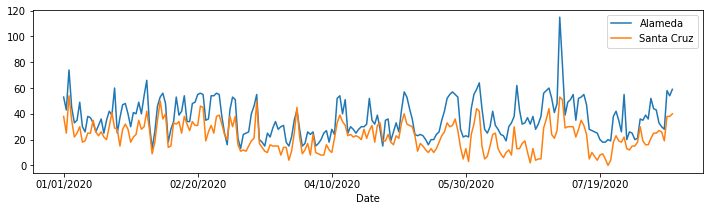

In [25]:
# that difference is not so obvious from the plots above, so let's zoom in for a closer look.
# we now restrict attention to dates before the target date.
ax = plt.gca()  # get current axes for the two plots to share.
# plot the 2 sub-dfs, one per county, using the same axes.
before[before.County=='Alameda'].plot(kind='line', x='Date', y='AQI', label='Alameda', figsize=(12,3), ax=ax)
before[before.County=='Santa Cruz'].plot(kind='line', x='Date', y='AQI', label='Santa Cruz', ax=ax)
plt.show()

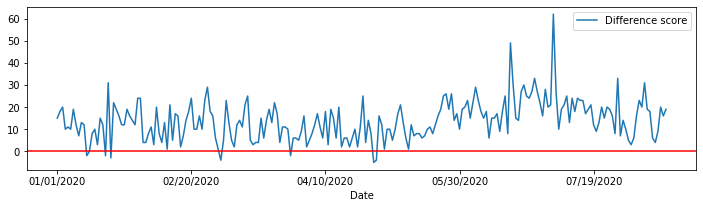

In [26]:
# the higher AQI for alameda county is now more visually apparent.
# let's consider a difference score, just to make sure.
# we are setting index to be Date so the 2 dfs are compatible.
a = before[before.County=='Alameda'][['Date','AQI']].set_index('Date',drop=False)
sc = before[before.County=='Santa Cruz'][['Date','AQI']].set_index('Date',drop=False)
d = a
d['Diff'] = a.AQI-sc.AQI
d.plot(kind='line', x='Date', y='Diff', label='Difference score', figsize=(12,3))
plt.axhline(0,color='red')
plt.show()

In [27]:
# now let's wrap up by looking at AQI *category counts*, by county, before the target date.
before

,Date,AQI,Category,Site,Site ID,Source,County
0,01/01/2020,53,Moderate,Oakland,06-001-0009,AQS,Alameda
1,01/02/2020,43,Good,Berkeley Aquatic Park,06-001-0013,AQS,Alameda
2,01/03/2020,74,Moderate,Berkeley Aquatic Park,06-001-0013,AQS,Alameda
3,01/04/2020,45,Good,Livermore,06-001-0007,AQS,Alameda
4,01/05/2020,33,Good,Livermore,06-001-0007,AQS,Alameda
...,...,...,...,...,...,...,...
470,08/11/2020,26,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz
471,08/12/2020,19,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz
472,08/13/2020,38,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz
473,08/14/2020,38,Good,Santa Cruz,06-087-0007,AirNow,Santa Cruz


We will be using [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), which is a convenient means of splitting up a df in different ways.
See also [this groupby tutorial](https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm)

In [28]:
# create a groupby object that splits the df up by County.
print(before.groupby('County'))

In [29]:
# that wasn't so easy to decipher.  so let's print out its subparts.
grouped = before.groupby('County')
for key, item in grouped:
    g = grouped.get_group(key)
    print(key, "\n", g, "\n", type(g), "\n\n")

Alameda 
            Date  AQI  Category                   Site      Site ID  Source  \
0    01/01/2020   53  Moderate                Oakland  06-001-0009     AQS   
1    01/02/2020   43      Good  Berkeley Aquatic Park  06-001-0013     AQS   
2    01/03/2020   74  Moderate  Berkeley Aquatic Park  06-001-0013     AQS   
3    01/04/2020   45      Good              Livermore  06-001-0007     AQS   
4    01/05/2020   33      Good              Livermore  06-001-0007     AQS   
..          ...  ...       ...                    ...          ...     ...   
223  08/11/2020   30      Good  Pleasanton - Owens Ct  06-001-0015  AirNow   
224  08/12/2020   28      Good  Pleasanton - Owens Ct  06-001-0015  AirNow   
225  08/13/2020   58  Moderate  Berkeley Aquatic Park  06-001-0013  AirNow   
226  08/14/2020   54  Moderate  Berkeley Aquatic Park  06-001-0013  AirNow   
227  08/15/2020   59  Moderate  Berkeley Aquatic Park  06-001-0013  AirNow   

      County  
0    Alameda  
1    Alameda  
2    Ala

In [30]:
# now pull out just the Category column
print(before.groupby('County').Category)
grouped = before.groupby('County').Category
for key, item in grouped:
    g = grouped.get_group(key)
    print(key, "\n", g, "\n", type(g), "\n\n")

Alameda 
 0      Moderate
1          Good
2      Moderate
3          Good
4          Good
         ...   
223        Good
224        Good
225    Moderate
226    Moderate
227    Moderate
Name: Category, Length: 228, dtype: object 
 <class 'pandas.core.series.Series'> 


Santa Cruz 
 247        Good
248        Good
249    Moderate
250        Good
251        Good
         ...   
470        Good
471        Good
472        Good
473        Good
474        Good
Name: Category, Length: 228, dtype: object 
 <class 'pandas.core.series.Series'> 




In [31]:
# now *count* the number of occurrences of each value of Category - still grouped by County.
print(before.groupby('County').Category.value_counts())

County      Category                      
Alameda     Good                              178
            Moderate                           49
            Unhealthy for Sensitive Groups      1
Santa Cruz  Good                              225
            Moderate                            3
Name: Category, dtype: int64


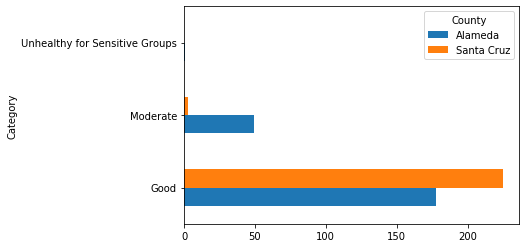

In [32]:
# and now plot.  unstack(0) is needed to get the data in the right format.  look it up!
# barh = bar plot, horizontal layout.
before.groupby('County').Category.value_counts().unstack(0).plot.barh()
plt.show()